# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Import API key
from config import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint
import json



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


641

In [7]:
#print city for nearest city result
print(len(cities))
cities

641


['lebu',
 'hasaki',
 'saldanha',
 'hermanus',
 'punta arenas',
 'tautira',
 'tir pol',
 'kununurra',
 'jinchang',
 'rikitea',
 'sitangkai',
 'bluff',
 'okhotsk',
 'mataura',
 'poya',
 'atuona',
 'zyryanka',
 'victoria',
 'georgetown',
 'vaini',
 'nipawin',
 'foshan',
 'ushuaia',
 'prabumulih',
 'walvis bay',
 'edea',
 'aswan',
 'orsk',
 'kamaishi',
 'ixtapa',
 'lloydminster',
 'saint george',
 'luderitz',
 'saint-philippe',
 'busselton',
 'katsuura',
 'itaueira',
 'oroville',
 'anage',
 'port alfred',
 'illoqqortoormiut',
 'bur gabo',
 'sangmelima',
 'albany',
 'yellowknife',
 'price',
 'cherskiy',
 'nantucket',
 'saskylakh',
 'cockburn town',
 'tahta',
 'xai-xai',
 'khatanga',
 'banjar',
 'jiddah',
 'filadelfia',
 'tsihombe',
 'comodoro rivadavia',
 'attawapiskat',
 'vardo',
 'san rafael',
 'chokurdakh',
 'olinda',
 'taolanaro',
 'aktau',
 'hilo',
 'belushya guba',
 'sinnamary',
 'springbok',
 'dzerzhinsk',
 'sorland',
 'nome',
 'port elizabeth',
 'qaanaaq',
 'sentyabrskiy',
 'faanui'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#base url 
url = "http://api.openweathermap.org/data/2.5/weather?"

# use imperial for Farenheit format
units = "imperial"
# list of cities we will find
cities = ['lebu',
 'hasaki',
 'saldanha',
 'hermanus',
 'punta arenas',
 'tautira',
 'tir pol',
 'kununurra',
 'jinchang',
 'rikitea',
 'sitangkai',
 'bluff',
 'okhotsk',
 'mataura',
 'poya',
 'atuona',
 'zyryanka',
 'victoria',
 'georgetown',
 'vaini',
 'nipawin',
 'foshan',
 'ushuaia',
 'prabumulih',
 'walvis bay',
 'edea',
 'aswan',
 'orsk',
 'kamaishi',
 'ixtapa',
 'lloydminster',
 'saint george',
 'luderitz',
 'saint-philippe',
 'busselton',
 'katsuura',
 'itaueira',
 'oroville',
 'anage',
 'port alfred',
 'illoqqortoormiut',
 'bur gabo',
 'sangmelima',
 'albany',
 'yellowknife',
 'price',
 'cherskiy',
 'nantucket',
 'saskylakh',
 'cockburn town',
 'tahta',
 'xai-xai',
 'khatanga',
 'banjar',
 'jiddah',
 'filadelfia',
 'tsihombe',
 'comodoro rivadavia',
 'attawapiskat',
 'vardo',
 'san rafael',
 'chokurdakh',
 'olinda',
 'taolanaro',
 'aktau',
 'hilo',
 'belushya guba',
 'sinnamary',
 'springbok',
 'dzerzhinsk',
 'sorland',
 'nome',
 'port elizabeth',
 'qaanaaq',
 'sentyabrskiy',
 'faanui',
 'upernavik',
 'sangar',
 'gushikawa',
 'boa vista',
 'isangel',
 'novo aripuana',
 'barrow',
 'ayagoz',
 'teterow',
 'hobart',
 'jurm',
 'formoso do araguaia',
 'carson city',
 'clarksburg',
 'george town',
 'kalininsk',
 'nikolskoye',
 'kontagora',
 'miyako',
 'alugan',
 'severnyy-kospashskiy',
 'tura',
 'maidenhead',
 'cam ranh',
 'lavrentiya',
 'beswan',
 'kavieng',
 'castro',
 'mahadday weyne',
 'nanortalik',
 'gorontalo',
 'cape town',
 'puerto ayora',
 'ancud',
 'oxapampa',
 'jamestown',
 'mvuma',
 'wagar',
 'sitka',
 'geraldton',
 'bakchar',
 'karaul',
 'asau',
 'buchanan',
 'new norfolk',
 'caravelas',
 'sarangani',
 'flinders',
 'zeya',
 'longlac',
 'columbus',
 'petrolina de goias',
 'amderma',
 'yinchuan',
 'saint-pierre',
 'palmer',
 'mys shmidta',
 'toliary',
 'ngukurr',
 'mar del plata',
 'burica',
 'leon',
 'taltal',
 'konya',
 'klaksvik',
 'alice springs',
 'san juan del sur',
 'pevek',
 'tual',
 'barentsburg',
 'villarrica',
 'cedar city',
 'thompson',
 'tiksi',
 'whitianga',
 'butaritari',
 'port hardy',
 'yaan',
 'la ciotat',
 'callaway',
 'pijijiapan',
 'shiyan',
 'bredasdorp',
 'samalaeulu',
 'kruisfontein',
 'samarai',
 'avarua',
 'grand river south east',
 'mishkino',
 'pitimbu',
 'iqaluit',
 'kaitangata',
 'phuket',
 'suao',
 'praya',
 'pangnirtung',
 'cajnice',
 'nokaneng',
 'hithadhoo',
 'grand gaube',
 'kushiro',
 'iskateley',
 'stokmarknes',
 'warqla',
 'navabad',
 'sept-iles',
 'lagoa',
 'nardaran',
 'bembereke',
 'dabou',
 'atambua',
 'dalvik',
 'kenai',
 'faya',
 'tapaua',
 'biak',
 'tuktoyaktuk',
 'santiago del estero',
 'waipawa',
 'tikapur',
 'celestun',
 'arraial do cabo',
 'codrington',
 'khagrachari',
 'sangueya',
 'ginir',
 'buala',
 'hamilton',
 'provideniya',
 'cabo san lucas',
 'valdivia',
 'tawkar',
 'kovdor',
 'kungsbacka',
 'ponta do sol',
 'souillac',
 'polson',
 'san juan',
 'launceston',
 'coquimbo',
 'carnarvon',
 'kysyl-syr',
 'monduli',
 'changli',
 'vostok',
 'namatanai',
 'viligili',
 'aklavik',
 'paamiut',
 'lorengau',
 'tunxi',
 'bayan',
 'bursa',
 'bosaso',
 'kapaa',
 'gordeyevka',
 'san cristobal',
 'rongcheng',
 'mount isa',
 'ust-ishim',
 'belyy yar',
 'norman wells',
 'yuryuzan',
 'guelengdeng',
 'geresk',
 'kautokeino',
 'tasiilaq',
 'tazovskiy',
 'mezen',
 'krasnoborsk',
 'mehamn',
 'demyansk',
 'saleaula',
 'mahebourg',
 'coolum beach',
 'laguna',
 'oltina',
 'cidreira',
 'ketchikan',
 'mosquera',
 'talcahuano',
 'ostrovnoy',
 'mount gambier',
 'ilulissat',
 'petropavlovsk-kamchatskiy',
 'hwange',
 'pochutla',
 'lima',
 'sydney',
 'port hedland',
 'ust-nera',
 'sataua',
 'havoysund',
 'svetlogorsk',
 'ballina',
 'constitucion',
 'quincy',
 'rabo de peixe',
 'tsirguliina',
 'nueva guinea',
 'xuddur',
 'impfondo',
 'karpuninskiy',
 'rolim de moura',
 'nikita',
 'clarksdale',
 'tiarei',
 'turkistan',
 'asfi',
 'karratha',
 'umm lajj',
 'tessalit',
 'dikson',
 'severo-kurilsk',
 'darab',
 'kutum',
 'port macquarie',
 'harper',
 'kinel',
 'vaitupu',
 'barra do corda',
 'saint combs',
 'taksimo',
 'tumannyy',
 'kobryn',
 'bull savanna',
 'madison heights',
 'sobolevo',
 'niquero',
 'yuzhnyy',
 'taoudenni',
 'ambon',
 'beloha',
 'lardos',
 'khandagayty',
 'nizhneyansk',
 'severnyy',
 'road town',
 'vanimo',
 'ovre ardal',
 'arman',
 'lokoja',
 'tocopilla',
 'bodden town',
 'san rafael del sur',
 'komsomolskiy',
 'kalat',
 'salalah',
 'ashoknagar',
 'tezu',
 'krasnoarmeyskoye',
 'los llanos de aridane',
 'kandrian',
 'meyungs',
 'fare',
 'lafiagi',
 'pisco',
 'kismayo',
 'belaya gora',
 'nalut',
 'bontang',
 'clyde river',
 'eureka',
 'port lincoln',
 'talnakh',
 'spas-demensk',
 'hervey bay',
 'vila velha',
 'nichinan',
 'jacareacanga',
 'mahon',
 'fortuna',
 'basco',
 'la ronge',
 'myrtle beach',
 'tsiroanomandidy',
 'serowe',
 'beringovskiy',
 'gusau',
 'porto novo',
 'nouadhibou',
 'namibe',
 'port-cartier',
 'dingle',
 'lolua',
 'guerrero negro',
 'tshela',
 'changde',
 'igboho',
 'pemba',
 'spornoye',
 'pembroke',
 'hofn',
 'pala',
 'borsa',
 'la baule-escoublac',
 'saquena',
 'agirish',
 'nishihara',
 'airai',
 'liku',
 'lokvine',
 'orlik',
 'kieta',
 'naze',
 'boddam',
 'gravdal',
 'heilbron',
 'touros',
 'avera',
 'shelburne',
 'mbandaka',
 'sioux lookout',
 'manteca',
 'ellensburg',
 'ormara',
 'rocha',
 'lasa',
 'mercedes',
 'zyryanovsk',
 'andevoranto',
 'esperance',
 'fraga',
 'port augusta',
 'mana',
 'pribelskiy',
 'wick',
 'east london',
 'husavik',
 'buraydah',
 'anadyr',
 'svetlaya',
 'ouadda',
 'kallithea',
 'itarema',
 'wasserburg',
 'purranque',
 'bethel',
 'saryshagan',
 'strezhevoy',
 'sur',
 'ribeira grande',
 'san policarpo',
 'marsh harbour',
 'nieuw amsterdam',
 'hearst',
 'the valley',
 'curuguaty',
 'roebourne',
 'kidal',
 'yabelo',
 'zimovniki',
 'mokhsogollokh',
 'kahului',
 'camacha',
 'axim',
 'bundaberg',
 'plouzane',
 'wanning',
 'putten',
 'bodaybo',
 'joshimath',
 'soyo',
 'bulungu',
 'guozhen',
 'arlit',
 'powell river',
 'wajir',
 'yumen',
 'vila franca do campo',
 'nobres',
 'capim grosso',
 'vredendal',
 'torbay',
 'davila',
 'erzin',
 'te anau',
 'bilibino',
 'seoul',
 'mumbwa',
 'indiaroba',
 'barra da estiva',
 'fairbanks',
 'tavricheskoye',
 'kumano',
 'pontianak',
 'pachino',
 'mildura',
 'sao filipe',
 'araouane',
 'lincoln',
 'baykit',
 'kudahuvadhoo',
 'krasnoshchekovo',
 'milkovo',
 'southbridge',
 'cayenne',
 'yulara',
 'alofi',
 'shumskiy',
 'lukovetskiy',
 'bandarbeyla',
 'cortez',
 'susangerd',
 'moranbah',
 'cap malheureux',
 'kerki',
 'maceio',
 'dunedin',
 'rio gallegos',
 'bereznik',
 'jumla',
 'kang',
 'valdemarpils',
 'tingrela',
 'nuuk',
 'lompoc',
 'amga',
 'akyab',
 'bambous virieux',
 'grand centre',
 'vestmannaeyjar',
 'thessalon',
 'barra patuca',
 'temba',
 'gasa',
 'hakui',
 'yerbogachen',
 'pacific grove',
 'aflu',
 'berlevag',
 'zhigansk',
 'luorong',
 'balclutha',
 'gornopravdinsk',
 'aiken',
 'bjerkvik',
 'mareeba',
 'kupang',
 'puerto madero',
 'sungairaya',
 'bloemfontein',
 'anderson',
 'preobrazheniye',
 'san quintin',
 'boueni',
 'state college',
 'praia da vitoria',
 'byron bay',
 'banda aceh',
 'leningradskiy',
 'halifax',
 'timizart',
 'college',
 'liverpool',
 'kirakira',
 'ostersund',
 'borger',
 'sabang',
 'bairiki',
 'sri aman',
 'lahaina',
 'egvekinot',
 'nylstroom',
 'penzance',
 'stornoway',
 'shimoda',
 'puri',
 'ramtek',
 'is',
 'hare bay',
 'chingirlau',
 'visby',
 'san felipe',
 'martvili',
 'kampong thum',
 'rungata',
 'bonavista',
 'santa rosalia',
 'hami',
 'acari',
 'takoradi',
 'poum',
 'cuamba',
 'gimli',
 'huangchuan',
 'grindavik',
 'narsaq',
 'kodiak',
 'san ignacio',
 'independenta',
 'wuwei',
 'deputatskiy',
 'lovozero',
 'mandiana',
 'alboraya',
 'forbes',
 'muzhi',
 'matina',
 'port hueneme',
 'sola',
 'palana',
 'haines junction',
 'puerto baquerizo moreno',
 'grande-riviere',
 'ko samui',
 'prince rupert',
 'marquette',
 'yasnyy',
 'awbari',
 'bani walid',
 'mookane',
 'gobabis',
 'uk',
 'odweyne',
 'necochea',
 'plastun',
 'bukachacha',
 'litoral del san juan',
 'denpasar',
 'kisangani',
 'half moon bay',
 'funadhoo',
 'flin flon',
 'chuy',
 'mantua',
 'naliya',
 'santa rosa',
 'qui nhon',
 'pontes e lacerda',
 'coshocton',
 'tateyama',
 'korla',
 'vila praia de ancora',
 'sfantu gheorghe',
 'zanatepec',
 'bunbury',
 'solnechnyy',
 'puerto carreno',
 'longyearbyen',
 'elliot lake',
 'jiuquan',
 'litovko',
 'marihatag',
 'morondava',
 'coihaique',
 'los negros',
 'makakilo city',
 'tuatapere',
 'talara',
 'dangriga',
 'khiri mat',
 'micheweni',
 'gorele',
 'maryanovka',
 'cabedelo',
 'cochrane',
 'viedma',
 'inderborskiy',
 'puerto suarez',
 'quatre cocos',
 'pietarsaari',
 'princeton',
 'phayakkhaphum phisai',
 'emerald']

In [17]:
#build query url
# query_url = f"{url}appid={weather_api_key}&units={units}&q={cities}"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [159]:
#create a list to hold all city 'names' with data
city_list = []

#empty lists to store data for lat,lng, temperature, humidity, cloudiness, wind
city_date = []
city_lat = []
city_lon = []
city_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []


#loop through database with "try and except" to create lists for above queries
for city in cities:
    try:
        #request query from api into .json format
        response = requests.get(query_url + city).json()
        #append to city list with the json titled 'name'
        city_list.append(response['name'])
        print(f"{city} appending name of city to list")
        #append data to empty lists above
        city_date.append(response['dt'])
        print(f"{city} appending date of weather")
        city_lat.append(response['coord']['lat'])
        print(f"{city} appending lat")
        city_lon.append(response['coord']['lon'])
        print(f"{city} appending lon")
        city_temp.append(response['main']['temp_max'])
        print(f"{city} appending temp_max")
        city_humidity.append(response['main']['humidity'])
        print(f"{city} appending humidity")
        city_cloudiness.append(response['clouds']['all'])
        print(f"{city} appending clouds")
        city_windspeed.append(response['wind']['speed'])
        print(f"{city} appending wind")
    
    except:
        #print f-string of each cities with data not found
        print(f"{city} not found")
        pass

lebu appending name of city to list
lebu appending date of weather
lebu appending lat
lebu appending lon
lebu appending temp_max
lebu appending humidity
lebu appending clouds
lebu appending wind
hasaki appending name of city to list
hasaki appending date of weather
hasaki appending lat
hasaki appending lon
hasaki appending temp_max
hasaki appending humidity
hasaki appending clouds
hasaki appending wind
saldanha appending name of city to list
saldanha appending date of weather
saldanha appending lat
saldanha appending lon
saldanha appending temp_max
saldanha appending humidity
saldanha appending clouds
saldanha appending wind
hermanus appending name of city to list
hermanus appending date of weather
hermanus appending lat
hermanus appending lon
hermanus appending temp_max
hermanus appending humidity
hermanus appending clouds
hermanus appending wind
punta arenas appending name of city to list
punta arenas appending date of weather
punta arenas appending lat
punta arenas appending lon
pun

anage appending name of city to list
anage appending date of weather
anage appending lat
anage appending lon
anage appending temp_max
anage appending humidity
anage appending clouds
anage appending wind
port alfred appending name of city to list
port alfred appending date of weather
port alfred appending lat
port alfred appending lon
port alfred appending temp_max
port alfred appending humidity
port alfred appending clouds
port alfred appending wind
illoqqortoormiut not found
bur gabo not found
sangmelima appending name of city to list
sangmelima appending date of weather
sangmelima appending lat
sangmelima appending lon
sangmelima appending temp_max
sangmelima appending humidity
sangmelima appending clouds
sangmelima appending wind
albany appending name of city to list
albany appending date of weather
albany appending lat
albany appending lon
albany appending temp_max
albany appending humidity
albany appending clouds
albany appending wind
yellowknife appending name of city to list
yel

barrow appending name of city to list
barrow appending date of weather
barrow appending lat
barrow appending lon
barrow appending temp_max
barrow appending humidity
barrow appending clouds
barrow appending wind
ayagoz appending name of city to list
ayagoz appending date of weather
ayagoz appending lat
ayagoz appending lon
ayagoz appending temp_max
ayagoz appending humidity
ayagoz appending clouds
ayagoz appending wind
teterow appending name of city to list
teterow appending date of weather
teterow appending lat
teterow appending lon
teterow appending temp_max
teterow appending humidity
teterow appending clouds
teterow appending wind
hobart appending name of city to list
hobart appending date of weather
hobart appending lat
hobart appending lon
hobart appending temp_max
hobart appending humidity
hobart appending clouds
hobart appending wind
jurm appending name of city to list
jurm appending date of weather
jurm appending lat
jurm appending lon
jurm appending temp_max
jurm appending humi

sarangani appending name of city to list
sarangani appending date of weather
sarangani appending lat
sarangani appending lon
sarangani appending temp_max
sarangani appending humidity
sarangani appending clouds
sarangani appending wind
flinders appending name of city to list
flinders appending date of weather
flinders appending lat
flinders appending lon
flinders appending temp_max
flinders appending humidity
flinders appending clouds
flinders appending wind
zeya appending name of city to list
zeya appending date of weather
zeya appending lat
zeya appending lon
zeya appending temp_max
zeya appending humidity
zeya appending clouds
zeya appending wind
longlac not found
columbus appending name of city to list
columbus appending date of weather
columbus appending lat
columbus appending lon
columbus appending temp_max
columbus appending humidity
columbus appending clouds
columbus appending wind
petrolina de goias appending name of city to list
petrolina de goias appending date of weather
pet

kaitangata appending name of city to list
kaitangata appending date of weather
kaitangata appending lat
kaitangata appending lon
kaitangata appending temp_max
kaitangata appending humidity
kaitangata appending clouds
kaitangata appending wind
phuket appending name of city to list
phuket appending date of weather
phuket appending lat
phuket appending lon
phuket appending temp_max
phuket appending humidity
phuket appending clouds
phuket appending wind
suao not found
praya appending name of city to list
praya appending date of weather
praya appending lat
praya appending lon
praya appending temp_max
praya appending humidity
praya appending clouds
praya appending wind
pangnirtung appending name of city to list
pangnirtung appending date of weather
pangnirtung appending lat
pangnirtung appending lon
pangnirtung appending temp_max
pangnirtung appending humidity
pangnirtung appending clouds
pangnirtung appending wind
cajnice appending name of city to list
cajnice appending date of weather
cajn

kungsbacka appending name of city to list
kungsbacka appending date of weather
kungsbacka appending lat
kungsbacka appending lon
kungsbacka appending temp_max
kungsbacka appending humidity
kungsbacka appending clouds
kungsbacka appending wind
ponta do sol appending name of city to list
ponta do sol appending date of weather
ponta do sol appending lat
ponta do sol appending lon
ponta do sol appending temp_max
ponta do sol appending humidity
ponta do sol appending clouds
ponta do sol appending wind
souillac appending name of city to list
souillac appending date of weather
souillac appending lat
souillac appending lon
souillac appending temp_max
souillac appending humidity
souillac appending clouds
souillac appending wind
polson appending name of city to list
polson appending date of weather
polson appending lat
polson appending lon
polson appending temp_max
polson appending humidity
polson appending clouds
polson appending wind
san juan appending name of city to list
san juan appending d

laguna appending name of city to list
laguna appending date of weather
laguna appending lat
laguna appending lon
laguna appending temp_max
laguna appending humidity
laguna appending clouds
laguna appending wind
oltina appending name of city to list
oltina appending date of weather
oltina appending lat
oltina appending lon
oltina appending temp_max
oltina appending humidity
oltina appending clouds
oltina appending wind
cidreira appending name of city to list
cidreira appending date of weather
cidreira appending lat
cidreira appending lon
cidreira appending temp_max
cidreira appending humidity
cidreira appending clouds
cidreira appending wind
ketchikan appending name of city to list
ketchikan appending date of weather
ketchikan appending lat
ketchikan appending lon
ketchikan appending temp_max
ketchikan appending humidity
ketchikan appending clouds
ketchikan appending wind
mosquera appending name of city to list
mosquera appending date of weather
mosquera appending lat
mosquera appending

severo-kurilsk appending name of city to list
severo-kurilsk appending date of weather
severo-kurilsk appending lat
severo-kurilsk appending lon
severo-kurilsk appending temp_max
severo-kurilsk appending humidity
severo-kurilsk appending clouds
severo-kurilsk appending wind
darab appending name of city to list
darab appending date of weather
darab appending lat
darab appending lon
darab appending temp_max
darab appending humidity
darab appending clouds
darab appending wind
kutum appending name of city to list
kutum appending date of weather
kutum appending lat
kutum appending lon
kutum appending temp_max
kutum appending humidity
kutum appending clouds
kutum appending wind
port macquarie appending name of city to list
port macquarie appending date of weather
port macquarie appending lat
port macquarie appending lon
port macquarie appending temp_max
port macquarie appending humidity
port macquarie appending clouds
port macquarie appending wind
harper appending name of city to list
harper

kandrian appending name of city to list
kandrian appending date of weather
kandrian appending lat
kandrian appending lon
kandrian appending temp_max
kandrian appending humidity
kandrian appending clouds
kandrian appending wind
meyungs not found
fare appending name of city to list
fare appending date of weather
fare appending lat
fare appending lon
fare appending temp_max
fare appending humidity
fare appending clouds
fare appending wind
lafiagi appending name of city to list
lafiagi appending date of weather
lafiagi appending lat
lafiagi appending lon
lafiagi appending temp_max
lafiagi appending humidity
lafiagi appending clouds
lafiagi appending wind
pisco appending name of city to list
pisco appending date of weather
pisco appending lat
pisco appending lon
pisco appending temp_max
pisco appending humidity
pisco appending clouds
pisco appending wind
kismayo appending name of city to list
kismayo appending date of weather
kismayo appending lat
kismayo appending lon
kismayo appending tem

spornoye appending name of city to list
spornoye appending date of weather
spornoye appending lat
spornoye appending lon
spornoye appending temp_max
spornoye appending humidity
spornoye appending clouds
spornoye appending wind
pembroke appending name of city to list
pembroke appending date of weather
pembroke appending lat
pembroke appending lon
pembroke appending temp_max
pembroke appending humidity
pembroke appending clouds
pembroke appending wind
hofn appending name of city to list
hofn appending date of weather
hofn appending lat
hofn appending lon
hofn appending temp_max
hofn appending humidity
hofn appending clouds
hofn appending wind
pala appending name of city to list
pala appending date of weather
pala appending lat
pala appending lon
pala appending temp_max
pala appending humidity
pala appending clouds
pala appending wind
borsa appending name of city to list
borsa appending date of weather
borsa appending lat
borsa appending lon
borsa appending temp_max
borsa appending humidi

svetlaya appending name of city to list
svetlaya appending date of weather
svetlaya appending lat
svetlaya appending lon
svetlaya appending temp_max
svetlaya appending humidity
svetlaya appending clouds
svetlaya appending wind
ouadda appending name of city to list
ouadda appending date of weather
ouadda appending lat
ouadda appending lon
ouadda appending temp_max
ouadda appending humidity
ouadda appending clouds
ouadda appending wind
kallithea appending name of city to list
kallithea appending date of weather
kallithea appending lat
kallithea appending lon
kallithea appending temp_max
kallithea appending humidity
kallithea appending clouds
kallithea appending wind
itarema appending name of city to list
itarema appending date of weather
itarema appending lat
itarema appending lon
itarema appending temp_max
itarema appending humidity
itarema appending clouds
itarema appending wind
wasserburg appending name of city to list
wasserburg appending date of weather
wasserburg appending lat
wass

yumen appending name of city to list
yumen appending date of weather
yumen appending lat
yumen appending lon
yumen appending temp_max
yumen appending humidity
yumen appending clouds
yumen appending wind
vila franca do campo appending name of city to list
vila franca do campo appending date of weather
vila franca do campo appending lat
vila franca do campo appending lon
vila franca do campo appending temp_max
vila franca do campo appending humidity
vila franca do campo appending clouds
vila franca do campo appending wind
nobres appending name of city to list
nobres appending date of weather
nobres appending lat
nobres appending lon
nobres appending temp_max
nobres appending humidity
nobres appending clouds
nobres appending wind
capim grosso appending name of city to list
capim grosso appending date of weather
capim grosso appending lat
capim grosso appending lon
capim grosso appending temp_max
capim grosso appending humidity
capim grosso appending clouds
capim grosso appending wind
vred

cap malheureux appending name of city to list
cap malheureux appending date of weather
cap malheureux appending lat
cap malheureux appending lon
cap malheureux appending temp_max
cap malheureux appending humidity
cap malheureux appending clouds
cap malheureux appending wind
kerki not found
maceio appending name of city to list
maceio appending date of weather
maceio appending lat
maceio appending lon
maceio appending temp_max
maceio appending humidity
maceio appending clouds
maceio appending wind
dunedin appending name of city to list
dunedin appending date of weather
dunedin appending lat
dunedin appending lon
dunedin appending temp_max
dunedin appending humidity
dunedin appending clouds
dunedin appending wind
rio gallegos appending name of city to list
rio gallegos appending date of weather
rio gallegos appending lat
rio gallegos appending lon
rio gallegos appending temp_max
rio gallegos appending humidity
rio gallegos appending clouds
rio gallegos appending wind
bereznik appending n

san quintin appending name of city to list
san quintin appending date of weather
san quintin appending lat
san quintin appending lon
san quintin appending temp_max
san quintin appending humidity
san quintin appending clouds
san quintin appending wind
boueni appending name of city to list
boueni appending date of weather
boueni appending lat
boueni appending lon
boueni appending temp_max
boueni appending humidity
boueni appending clouds
boueni appending wind
state college appending name of city to list
state college appending date of weather
state college appending lat
state college appending lon
state college appending temp_max
state college appending humidity
state college appending clouds
state college appending wind
praia da vitoria appending name of city to list
praia da vitoria appending date of weather
praia da vitoria appending lat
praia da vitoria appending lon
praia da vitoria appending temp_max
praia da vitoria appending humidity
praia da vitoria appending clouds
praia da vit

gimli appending name of city to list
gimli appending date of weather
gimli appending lat
gimli appending lon
gimli appending temp_max
gimli appending humidity
gimli appending clouds
gimli appending wind
huangchuan appending name of city to list
huangchuan appending date of weather
huangchuan appending lat
huangchuan appending lon
huangchuan appending temp_max
huangchuan appending humidity
huangchuan appending clouds
huangchuan appending wind
grindavik appending name of city to list
grindavik appending date of weather
grindavik appending lat
grindavik appending lon
grindavik appending temp_max
grindavik appending humidity
grindavik appending clouds
grindavik appending wind
narsaq appending name of city to list
narsaq appending date of weather
narsaq appending lat
narsaq appending lon
narsaq appending temp_max
narsaq appending humidity
narsaq appending clouds
narsaq appending wind
kodiak appending name of city to list
kodiak appending date of weather
kodiak appending lat
kodiak appending

funadhoo appending name of city to list
funadhoo appending date of weather
funadhoo appending lat
funadhoo appending lon
funadhoo appending temp_max
funadhoo appending humidity
funadhoo appending clouds
funadhoo appending wind
flin flon appending name of city to list
flin flon appending date of weather
flin flon appending lat
flin flon appending lon
flin flon appending temp_max
flin flon appending humidity
flin flon appending clouds
flin flon appending wind
chuy appending name of city to list
chuy appending date of weather
chuy appending lat
chuy appending lon
chuy appending temp_max
chuy appending humidity
chuy appending clouds
chuy appending wind
mantua appending name of city to list
mantua appending date of weather
mantua appending lat
mantua appending lon
mantua appending temp_max
mantua appending humidity
mantua appending clouds
mantua appending wind
naliya appending name of city to list
naliya appending date of weather
naliya appending lat
naliya appending lon
naliya appending te

quatre cocos appending name of city to list
quatre cocos appending date of weather
quatre cocos appending lat
quatre cocos appending lon
quatre cocos appending temp_max
quatre cocos appending humidity
quatre cocos appending clouds
quatre cocos appending wind
pietarsaari appending name of city to list
pietarsaari appending date of weather
pietarsaari appending lat
pietarsaari appending lon
pietarsaari appending temp_max
pietarsaari appending humidity
pietarsaari appending clouds
pietarsaari appending wind
princeton appending name of city to list
princeton appending date of weather
princeton appending lat
princeton appending lon
princeton appending temp_max
princeton appending humidity
princeton appending clouds
princeton appending wind
phayakkhaphum phisai appending name of city to list
phayakkhaphum phisai appending date of weather
phayakkhaphum phisai appending lat
phayakkhaphum phisai appending lon
phayakkhaphum phisai appending temp_max
phayakkhaphum phisai appending humidity
phayak

In [91]:
#used to locate data 'names' in json data
print(json.dumps(response, indent=1))

{
 "coord": {
  "lon": 148.17,
  "lat": -23.53
 },
 "weather": [
  {
   "id": 800,
   "main": "Clear",
   "description": "clear sky",
   "icon": "01d"
  }
 ],
 "base": "stations",
 "main": {
  "temp": 91,
  "feels_like": 93.67,
  "temp_min": 91,
  "temp_max": 91,
  "pressure": 1010,
  "humidity": 45
 },
 "wind": {
  "speed": 5.99,
  "deg": 135,
  "gust": 8.99
 },
 "clouds": {
  "all": 0
 },
 "dt": 1583563744,
 "sys": {
  "type": 3,
  "id": 2000606,
  "country": "AU",
  "sunrise": 1583525141,
  "sunset": 1583569880
 },
 "timezone": 36000,
 "id": 2167426,
 "name": "Emerald",
 "cod": 200
}


In [160]:
#create dataframe/dictionary with data we collected into lists above
city_data_dict = {"City": city_list,
                  "Date": city_date,
                  "Lat": city_lat,
                  "Lon": city_lon,
                  "Temp": city_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_cloudiness,
                  "Wind Speed": city_windspeed
            }

In [161]:
#create dataframe and show data
city_df = pd.DataFrame(city_data_dict)
city_df

,City,Date,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,1583576034,-37.62,-73.65,57.92,85,83,8.03
1,Hasaki,1583576034,35.73,140.83,46.40,65,75,6.93
2,Saldanha,1583576034,-33.01,17.94,84.20,39,0,8.05
3,Hermanus,1583576035,-34.42,19.23,80.01,74,0,5.99
4,Punta Arenas,1583576035,-53.15,-70.92,44.60,93,40,11.41
...,...,...,...,...,...,...,...,...
579,Quatre Cocos,1583576256,-20.21,57.76,82.40,88,90,10.29
580,Pedersore,1583576257,63.65,22.68,37.00,74,36,11.41
581,Princeton,1583576257,25.54,-80.41,64.00,62,1,11.41
582,Phayakkhaphum Phisai,1583576258,15.52,103.19,97.00,41,20,6.93


In [97]:
#check entries count
len(city_df)

584

In [162]:
#output data into a csv in 'output_data' folder
city_df.to_csv("../output/cities_ha.csv", index=False, header=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

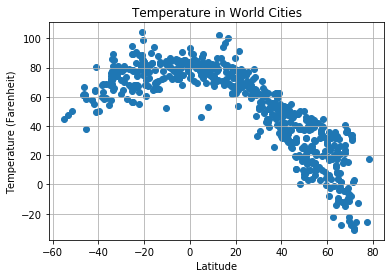

In [119]:
# scatter plot  Latitude vs. Temperature
plt.scatter([city_lat], [city_temp], marker="o")
# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
# plt.savefig("TemperatureInWorldCities.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

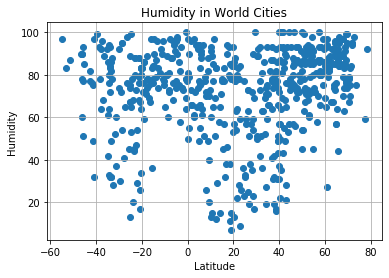

In [120]:
#Humidity (%) vs. Latitude
plt.scatter([city_lat], [city_humidity], marker="o")
# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
# plt.savefig("HumiditiesInWorldCities.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

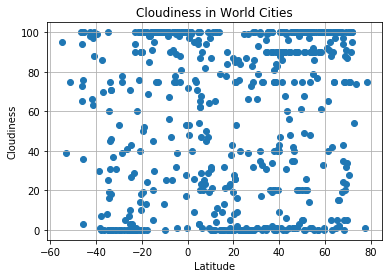

In [121]:
#Latitude vs. Cloudiness
plt.scatter([city_lat], [city_cloudiness], marker="o")
# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
# plt.savefig("CloudinessInWorldCities.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

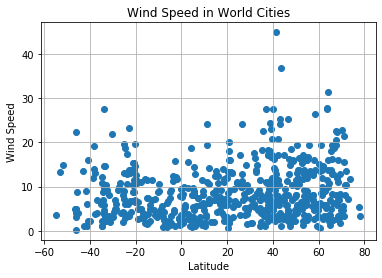

In [122]:
#Latitude vs. Wind
plt.scatter([city_lat], [city_windspeed], marker="o")
# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
# plt.savefig("WindSpeedInWorldCities.png")
# Show plot
plt.show()


## Linear Regression

In [133]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = city_df['Lat']
y_values = city_df['Temp']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0       90.191942
1       43.659218
2       87.267391
3       88.161885
4      100.044065
          ...    
579     79.147161
580     25.946966
581     50.123682
582     56.480300
583     81.253345
Name: Lat, Length: 584, dtype: float64


In [134]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.63x +66.33


The r-squared is: 0.5526688673073439


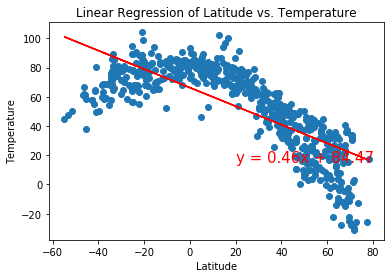

In [145]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression of Latitude vs. Temperature")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()


## Northern Hemisphere Dataframe

In [175]:
#use .loc to show NORTHERN Hemisphere cities (0 to 90degrees)
nhem_df = city_df.loc[city_df['Lat'] > 0]
nhem_df

,City,Date,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed
1,Hasaki,1583576034,35.73,140.83,46.40,65,75,6.93
7,Jinchang,1583576037,38.50,102.17,46.58,21,0,7.63
9,Venice of the Philippines,1583576038,4.66,119.39,82.74,76,100,9.91
11,Okhotsk,1583576039,59.38,143.30,-5.62,95,0,1.32
15,Zyryanka,1583575925,65.75,150.85,-7.67,84,0,8.28
...,...,...,...,...,...,...,...,...
574,Görele,1583576093,41.03,39.00,53.60,81,0,5.82
576,Cochrane,1583576031,51.18,-114.47,18.00,85,90,9.17
580,Pedersore,1583576257,63.65,22.68,37.00,74,36,11.41
581,Princeton,1583576257,25.54,-80.41,64.00,62,1,11.41


## Southern Hemisphere Dataframe

In [164]:
#use .loc to show SOUTHERN Hemisphere cities (0 to 90degrees)
shem_df = city_df.loc[city_df['Lat'] < 0]
shem_df

,City,Date,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,1583576034,-37.62,-73.65,57.92,85,83,8.03
2,Saldanha,1583576034,-33.01,17.94,84.20,39,0,8.05
3,Hermanus,1583576035,-34.42,19.23,80.01,74,0,5.99
4,Punta Arenas,1583576035,-53.15,-70.92,44.60,93,40,11.41
5,Tautira,1583576036,-17.73,-149.15,80.60,78,20,4.70
...,...,...,...,...,...,...,...,...
575,Cabedelo,1583576255,-6.98,-34.83,78.80,100,40,4.70
577,Viedma,1583576224,-40.81,-63.00,80.40,40,94,14.16
578,Puerto Suárez,1583576256,-18.95,-57.80,67.75,69,0,2.75
579,Quatre Cocos,1583576256,-20.21,57.76,82.40,88,90,10.29


###  Linear Regression: Northern Hemisphere -  Temperature

R squared: -0.8735996800200113


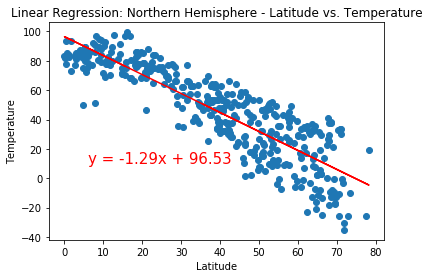

In [176]:
#Northern Hemisphere - Latitude vs Temperature (F) 
## Convert to floats and store as x and y values
x_nhem_lat = nhem_df['Lat'].astype('float')
y_nhem_max_temp = nhem_df['Temp'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_nhem_lat, y_nhem_max_temp)
ntemp_regress_values = x_nhem_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_nhem_lat, y_nhem_max_temp)
plt.title("Linear Regression: Northern Hemisphere - Latitude vs. Temperature")
# Plot regression line
plt.plot(x_nhem_lat,ntemp_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature')
# Print r square value
print(f"R squared: {rvalue}")
# Show plot
plt.show()

###  Linear Regression: Southern Hemisphere -  Temperature 

R squared: 0.5495090979869496


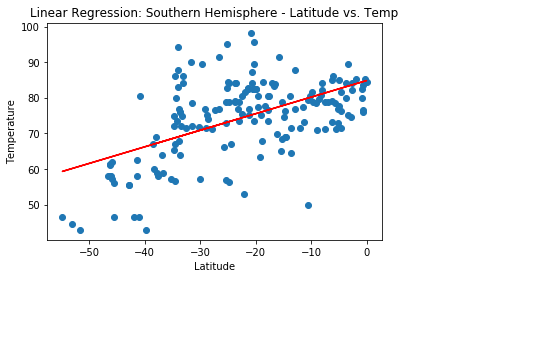

ANALYSIS FOR TEMPERATURE:
Both linear regression lines of both graphs for Temperature follow the same pattern. As the Latitude is closer to 0, the temperature is at its highest, making it hottest near 0 degrees at the equator.  The farther south the location(from 0 towards -90 degrees) the cooler the temperature becomes. The farther north the location(towards 90 degrees), also the cooler the temperature becomes.


In [193]:
#Southern Hemisphere - Latitude vs Temperature (F) 
## Convert to floats and store as x and y values
x_shem_lat = shem_df['Lat'].astype('float')
y_shem_temp = shem_df['Temp'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_shem_lat, y_shem_temp)
stemp_regress_values = x_shem_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_shem_lat,y_shem_temp)
plt.title("Linear Regression: Southern Hemisphere - Latitude vs. Temp")
# Plot regression line
plt.plot(x_shem_lat,stemp_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature')
# Print r square value
print(f"R squared: {rvalue}")
# Show plot
plt.show()
#Compare north and south hemisphere TEMP and analysis
print("ANALYSIS FOR TEMPERATURE:")
print(f"Both linear regression lines of both graphs for Temperature follow the same pattern. As the Latitude is closer to 0, the temperature is at its highest, making it hottest near 0 degrees at the equator.  The farther south the location(from 0 towards -90 degrees) the cooler the temperature becomes. The farther north the location(towards 90 degrees), also the cooler the temperature becomes.")

###  Linear Regression: Northern Hemisphere -  Latitude vs. Humidity (%)

R squared: 0.32226361324465397


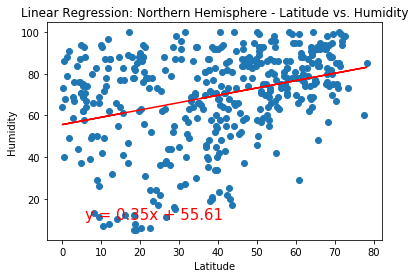

In [189]:
#Northern Hemisphere - Latitude vs. Humidity (%)
## Convert to floats and store as x and y values
x_nhem_lat = nhem_df['Lat'].astype('float')
y_nhem_humidity = nhem_df['Humidity'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_nhem_lat, y_nhem_humidity)
nhum_regress_values = x_nhem_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_nhem_lat,y_nhem_humidity)
plt.title("Linear Regression: Northern Hemisphere - Latitude vs. Humidity")
# Plot regression line
plt.plot(x_nhem_lat,nhum_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Print r square value
print(f"R squared: {rvalue}")
# Show plot
plt.show()



###  Linear Regression: Southern Hemisphere - Latitude vs. Humidity (%) 

R squared: 0.16788239895542334


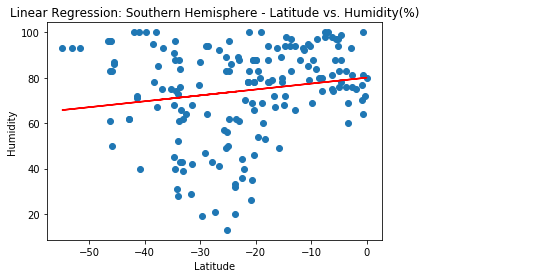

ANALYSIS FOR HUMIDITY:
Both linear regression lines show similar patterns between Northern and Southern Hemispheres. The higher the latitude, the more humidity you experience.  The lower the latitude, the slightly less humidity you experience.


In [195]:
#Southern Hemisphere - Latitude vs. Humidity (%) 
## Convert to floats and store as x and y values
x_shem_lat = shem_df['Lat'].astype('float')
y_shem_humidity = shem_df['Humidity'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_shem_lat, y_shem_humidity)
shum_regress_values = x_shem_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_shem_lat,y_shem_humidity)
plt.title("Linear Regression: Southern Hemisphere - Latitude vs. Humidity(%)")
# Plot regression line
plt.plot(x_shem_lat,shum_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Print r square value
print(f"R squared: {rvalue}")
# Show plot
plt.show()
#Compare north and south hemisphere TEMP and analysis
print("ANALYSIS FOR HUMIDITY:")
print("Both linear regression lines show similar patterns between Northern and Southern Hemispheres. The higher the latitude, the more humidity you experience.  The lower the latitude, the slightly less humidity you experience.")

###  Linear Regression: Northern Hemisphere - Latitude vs. Cloudiness (%) 

R squared: 0.32226361324465397


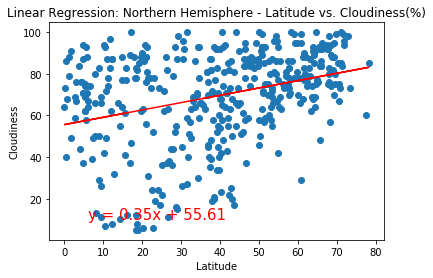

In [187]:
#Northern Hemisphere - Latitude vs. Cloudiness (%) 
## Convert to floats and store as x and y values
x_nhem_lat = nhem_df['Lat'].astype('float')
y_nhem_cloudiness = nhem_df['Humidity'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_nhem_lat, y_nhem_cloudiness)
ncloud_regress_values = x_nhem_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_nhem_lat,y_nhem_cloudiness)
plt.title("Linear Regression: Northern Hemisphere - Latitude vs. Cloudiness(%)")
# Plot regression line
plt.plot(x_nhem_lat,ncloud_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Print r square value
print(f"R squared: {rvalue}")
# Show plot
plt.show()


####  Linear Regression: Southern Hemisphere - Latitude vs. Cloudiness (%) 

R squared: 0.10919080982449095


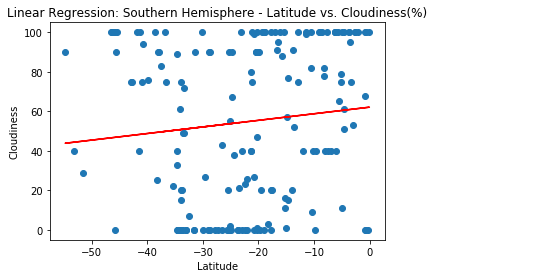

ANALYSIS FOR CLOUDINESS:
Northern Hemisphere has more clouds as the latitude increases towards 90 degrees. For the Southern Hemisphere, there are less clouds as you move towards -90 degrees in Latitude.


In [192]:
#Southern Hemisphere - Latitude vs. Cloudiness (%) 
## Convert to floats and store as x and y values
x_shem_lat = shem_df['Lat'].astype('float')
y_shem_cloudiness = shem_df['Cloudiness'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_shem_lat, y_shem_cloudiness)
scloud_regress_values = x_shem_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_shem_lat,y_shem_cloudiness)
plt.title("Linear Regression: Southern Hemisphere - Latitude vs. Cloudiness(%)")
# Plot regression line
plt.plot(x_shem_lat,scloud_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Print r square value
print(f"R squared: {rvalue}")
# Show plot
plt.show()
#Compare north and south hemisphere TEMP and analysis
print("ANALYSIS FOR CLOUDINESS:")
print("Northern Hemisphere has more clouds as the latitude increases towards 90 degrees. For the Southern Hemisphere, there are less clouds as you move towards -90 degrees in Latitude.")

####  Linear Regression: Northern Hemisphere - Latitude vs. Wind Speed (mph) 

R squared: 0.17308082380176165


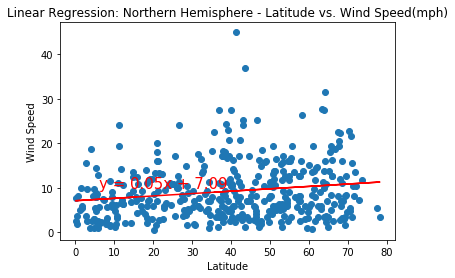

In [157]:
#Northern Hemisphere - Latitude vs. Wind Speed (mph) 
## Convert to floats and store as x and y values
x_nhem_lat = nhem_df['Lat'].astype('float')
y_nhem_wind = nhem_df['Wind Speed'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_nhem_lat, y_nhem_wind)
nwind_regress_values = x_nhem_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_nhem_lat,y_nhem_wind)
plt.title("Linear Regression: Northern Hemisphere - Latitude vs. Wind Speed(mph)")
# Plot regression line
plt.plot(x_nhem_lat,nwind_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Print r square value
print(f"R squared: {rvalue}")
# Show plot
plt.show()

####  Linear Regression: Southern Hemisphere - Latitude vs. Wind Speed (mph) 

R squared: -0.2513607339334571


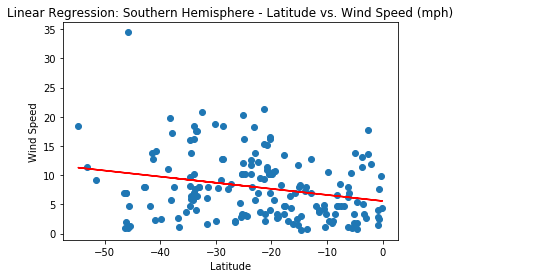

ANALYSIS FOR TEMPERATURE:
According to both of these plot graphs, there is less wind closer to 0 degrees Latitude.  Locations farther north or south of the equator show to have more wind than at the equator.


In [196]:
#Southern Hemisphere - Latitude vs. Wind Speed (mph)
## Convert to floats and store as x and y values
x_shem_lat = shem_df['Lat'].astype('float')
y_shem_wind = shem_df['Wind Speed'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_shem_lat, y_shem_wind)
swind_regress_values = x_shem_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_shem_lat,y_shem_wind)
plt.title("Linear Regression: Southern Hemisphere - Latitude vs. Wind Speed (mph)")
# Plot regression line
plt.plot(x_shem_lat,swind_regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Print r square value
print(f"R squared: {rvalue}")
# Show plot
plt.show()
#Compare north and south hemisphere TEMP and analysis
print("ANALYSIS FOR TEMPERATURE:")
print(f"According to both of these plot graphs, there is less wind closer to 0 degrees Latitude.  Locations farther north or south of the equator show to have more wind than at the equator.")